### 간단한 인공신경망 만들기

In [7]:
import torch
from torch import nn
from torchviz import make_dot

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.6258]], requires_grad=True)
Parameter containing:
tensor([0.8439], requires_grad=True)
tensor([0.2180], grad_fn=<ViewBackward0>)
tensor([0.2180], grad_fn=<AddBackward0>)


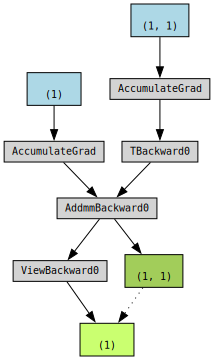

In [8]:
x = torch.tensor([1.])
model = nn.Linear(1, 1) # 입력 node 한 개, 출력 node 한 개인 layer 만듦
print(model)

print(model.weight) # 만들면서 initialize 함
print(model.bias)

y = model(x)
print(y)

y2 = x @ model.weight + model.bias # 식으로 나타낸 것
print(y2)

make_dot(y)


tensor([ 1.1148, -1.0195,  1.4893], grad_fn=<ViewBackward0>)
tensor([0.0321], grad_fn=<ViewBackward0>)
tensor([0.0321], grad_fn=<AddBackward0>)


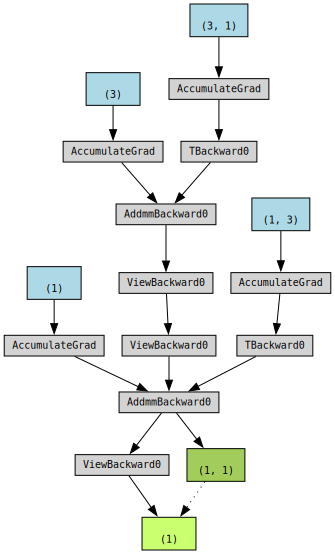

In [40]:
fc1 = nn.Linear(1,3) # fully-connected
fc2 = nn.Linear(3,1)

# print(fc1.weight)
# print(fc1.bias)
# print(fc2.weight)
# print(fc2.bias)

# fc1 -> fc2

x = torch.tensor([1.])
x=fc1(x)
print(x)
y=fc2(x)
print(y)

x = torch.tensor([1.])
y2 = (x@fc1.weight.T + fc1.bias) @ fc2.weight.T + fc2.bias # 수식
print(y2)

make_dot(y)

tensor([-0.3744, -0.1114])
tensor([-0.2209, -0.6055,  0.8447], grad_fn=<ViewBackward0>)


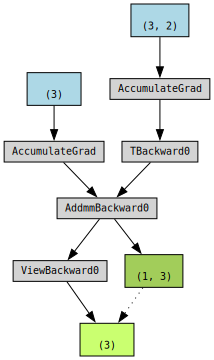

In [44]:
model = nn.Linear(2,3)
x = torch.randn(2)
print(x)
print(model(x))
# nn.Linear 는 데이터의 shape의 마지막 차원이 '채'로 (1D data) 들어오길 기대하는 녀석임
# ( 입력 노드 하나가 곧 하나의 채널(피쳐) 값을 의미)
# ('채널'은 'TV 채널'의 '채널' 같이 특정 유형의 정보를 전달하는 통로. 즉, 피쳐(특징)와 의미적으로 비슷하다
make_dot(model(x))

torch.Size([4, 5, 3])
torch.Size([2, 3, 6, 4, 5, 3])


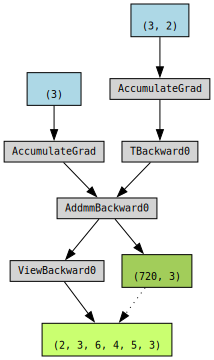

In [49]:
model = nn.Linear(2,3)
# 따라서, 데이터 여러 개를 통과시키고 싶다면 개x채 의 형태로 줘야함 ('채x개'나 '개*채' 이런 식으로 말고!)
x = torch.randn(5,2) #개x채 => 두 개의 채널(키, 몸무게)을 가지는 데이터(사람) 5개

# print(x)
# print(model(x))

x = torch.randn(4,5,2) ## nn.Linear 이거를 개x개x채로 들어왔다고 생각함
print(model(x).shape)

x = torch.randn(2,3,6,4,5,2)
print(model(x).shape)

make_dot(model(x))

# 웨이트 행렬에 Transpose 하는 이유 -> weight 도 데이터와 마찬가지로 개x채 형태로 만들기 위함!
# 예를들어, nn.Linear(2,3) 이면 두 채널 값을 사용하는 세 '개'의 필터를 통과하는 것이라 3x2가 된다
# 데이터의 개체는 두 채널 값을 가지는 열 개의 데이터 ( 10 x 2 )
# 웨이트의 개체는 두 채널 값을 이용하는 세 개의 필터 ( 3 x 2 )


tensor([-0.5710,  1.0819,  0.8113], grad_fn=<ViewBackward0>)
tensor([-0.1051], grad_fn=<ViewBackward0>)
tensor([-0.1051], grad_fn=<ViewBackward0>)


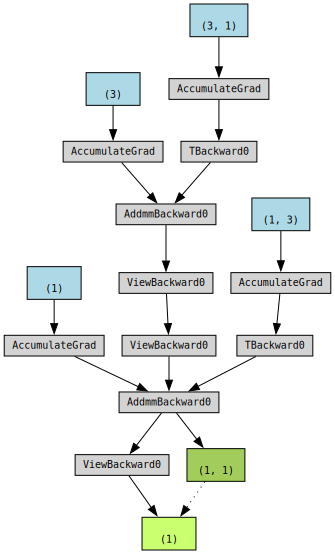

In [50]:
fc1 = nn.Linear(1,3)
fc2 = nn.Linear(3,1)

x = torch.tensor([1.])
x=fc1(x)
print(x)
y=fc2(x)
print(y)

model = nn.Sequential(fc1, fc2)
x = torch.tensor([1.])
print(model(x))

make_dot(model(x))

In [52]:
model = nn.Sequential(nn.Linear(2,5), nn.Linear(5,10), nn.Linear(10,3))
x = torch.randn(5,2)
print(x)
print(model(x))

tensor([[ 2.4185,  0.0247],
        [-0.8409, -1.5338],
        [-0.3594, -1.1987],
        [ 1.8443, -1.1154],
        [-0.4653, -0.5530]])
tensor([[ 0.0102,  0.8527,  0.5770],
        [ 0.0325,  0.3918, -0.2257],
        [ 0.0346,  0.4500, -0.1134],
        [-0.0306,  0.8531,  0.4871],
        [ 0.0714,  0.3693, -0.1809]], grad_fn=<AddmmBackward0>)


tensor([[0.4465, 0.4147, 0.4946],
        [0.4483, 0.4170, 0.4951],
        [0.4501, 0.4140, 0.4967],
        [0.4503, 0.4133, 0.4970],
        [0.4516, 0.4125, 0.4978]], grad_fn=<SigmoidBackward0>)


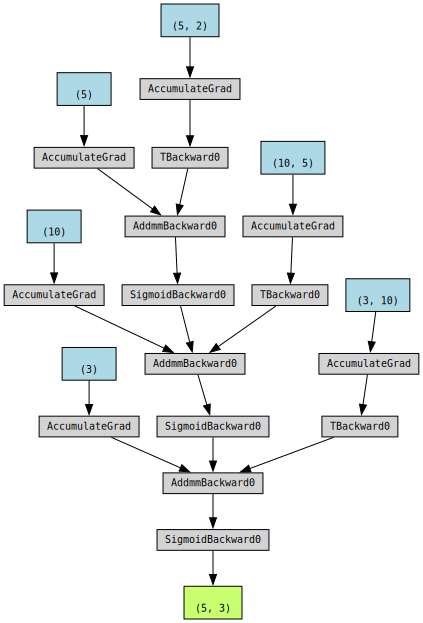

In [54]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(2,5)
        self.fc2 = nn.Linear(5,10)
        self.fc3 = nn.Linear(10,3)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.act(x)
        x = self.fc3(x)
        x = self.act(x)
        return x

model = MyModel()
x = torch.randn(5,2)
y = model(x) # model.forward(x) -> (nn.Module의 __call__
             # 에서 forward 를 통과시킴 ) (__call__ 은 인스턴스()로 호출할 수 있는 메서드 )
print(y)

make_dot(y)

tensor([[0.5294, 0.5364, 0.4762],
        [0.5278, 0.5460, 0.4765],
        [0.5193, 0.5339, 0.4796],
        [0.5256, 0.5369, 0.4775],
        [0.5315, 0.5325, 0.4749]], grad_fn=<SigmoidBackward0>)


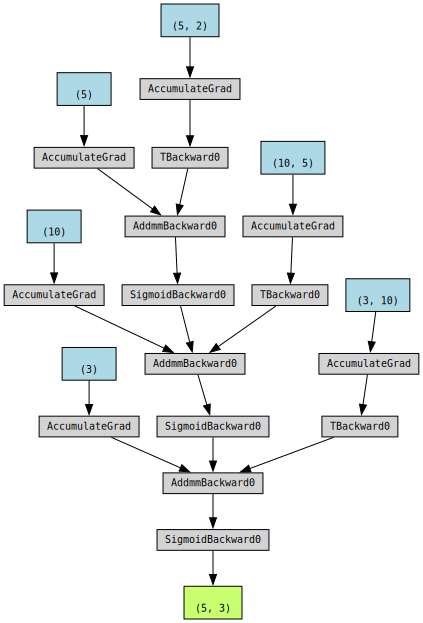

In [56]:
class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(2,5),
                                    nn.Sigmoid(),
                                    nn.Linear(5,10),
                                    nn.Sigmoid(),
                                    nn.Linear(10,3),
                                    nn.Sigmoid())

    def forward(self, x):
        x = self.linear(x)
        return x

model2 = MyModel2()
x = torch.randn(5,2)
y = model2(x)
print(y)

make_dot(y)

In [60]:
print(model2)
print(model2.linear[0].weight)
print(model2.linear[-2].bias)

MyModel2(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=3, bias=True)
    (5): Sigmoid()
  )
)
Parameter containing:
tensor([[ 0.6411,  0.1465],
        [-0.4738, -0.4280],
        [-0.4896,  0.6837],
        [-0.1103,  0.5804],
        [ 0.3027,  0.5337]], requires_grad=True)
Parameter containing:
tensor([-0.0834,  0.0182, -0.1862], requires_grad=True)


In [62]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0556, -0.6810],
         [ 0.0783,  0.5054],
         [ 0.5135, -0.4135],
         [-0.3877, -0.5797],
         [ 0.6138, -0.1888]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1016, -0.5430, -0.5457,  0.6788, -0.6143], requires_grad=True),
 Parameter containing:
 tensor([[-0.0632,  0.3866, -0.0334,  0.0083, -0.2472],
         [ 0.0447, -0.3578, -0.2235,  0.3720, -0.4453],
         [-0.1576, -0.0101, -0.1616, -0.3764,  0.1083],
         [-0.0299, -0.0748,  0.2164, -0.3344, -0.4328],
         [-0.2203, -0.0314, -0.3196, -0.0929, -0.2136],
         [ 0.0799,  0.3005, -0.2085, -0.4385, -0.2742],
         [-0.2469, -0.0119, -0.0448,  0.1708, -0.3766],
         [-0.2839, -0.4463,  0.3650, -0.3882,  0.1688],
         [-0.3865, -0.1380,  0.1050, -0.3481,  0.2543],
         [ 0.2648, -0.3627, -0.2984,  0.0342,  0.3857]], requires_grad=True),
 Parameter containing:
 tensor([-0.3124,  0.4269, -0.0347,  0.0759,  0.0468, -0.1643, -0.2658,  0.1499,
  

In [63]:
# 파라미터 수 구하기
num = sum([p.numel() for p in model.parameters() if p.requires_grad])
print(num)

108
